In [68]:
# Python code to build Machine Learning model for hurricane intensity forecast  
import pandas as pd # For data manipulation and analysis
pd.set_option('display.max_columns', 500)
import numpy as np # For scientific computing
import statistics
import time
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
from numpy import arange




#from sklearn.ensemble import ExtraTreesClassifier    # Extra tree classifier
from sklearn.metrics import confusion_matrix # Compute confusion matrix to evaluate the accuracy of a classification.
from sklearn.metrics import brier_score_loss  # Compute the Brier score
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import brier_score_loss  # Compute the Brier score
from sklearn.model_selection import GridSearchCV


import matplotlib.pyplot as plt  #plotting library


#Displaying More Rows
pd.options.display.max_rows = 500

In [69]:
# Set up the location of the data
fname='SHIPS_RII_fcst_ATL_Alicia.csv'
#fname='Dataset_SHIPS_RII_EPAC.csv'

# Read SHIPS data
ships = pd.read_csv(fname)

ships.head(50)

,NAME,DATE,HOUR,VMAX,LAT,LON,MSLP,ID,DELV12,DELV24,DELV36,DELV48,PER,SHRD,D200,RHLO,PX30,SDBT,POT,RHCN,NOHC,TPW,PC2,SHRD2,SHRG,DIVC,U200,EPSS,ENSS,TPWC,PC1,AVBT,AVBT2,SDBT2,PX10,PX20,PX50,TBMX,RSST,BTAV,VS,prcp,prcp_surp,iwp_merra,lwp_merra,pwv_merra,tk100_merra,rh150_merra,rhmid_merra,erh_merra,iwp_surp_merra,lwp_surp_merra,pwv_surp_merra,tk100_surp_merra,rh150_surp_merra,rhmid_surp_merra,erh_surp_merra,iwp_vs_merra,lwp_vs_merra,pwv_vs_merra,tk100_vs_merra,rh150_vs_merra,rhmid_vs_merra,erh_vs_merra,VMAX_fcst,LAT_fcst,LON_fcst,PER_fcst,SHRD_fcst,SHRD2_fcst,D200_fcst,RHLO_fcst,SDBT_fcst,AVBT_fcst,AVBT2_fcst,SDBT2_fcst,PX10_fcst,PX20_fcst,PX50_fcst,TBMX_fcst,BTAV_fcst,VMPI_fcst,POT_fcst,NOHC_fcst,TPW_fcst,TPWC_fcst,PC2_fcst,PC1_fcst,T000_fcst,R000_fcst,SHRG_fcst,DIVC_fcst,U200_fcst,EPSS_fcst,ENSS_fcst,RSST_fcst,SHTD_fcst,SHGC_fcst,T200_fcst,T250_fcst,Z850_fcst,EPOS_fcst,RHMD_fcst,TADV_fcst,DTL_fcst,PSLV_fcst,UMOV_fcst
0,ALBE,820602,12,20,21.7,-87.1,1005,AL011982,10,30,45,25,9999,26.4,64,70,9999,9999.0,-103,0,9999,113,9999,25.1,29.6,49,22.4,5.1,1.6,61.8,9999,9999,9999,9999,9999,9999,9999,9999.0,28.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999,9999.0,9999.0,9999,9999.0,9999.0,9999,9999,9999.0,9999.0,9999.0,9999.0,9999,9999,9999,9999.0,9999.0,9999,9999,9999,9999,9999.0,9999,9999,9999.0,9999,9999.0,9999,9999.0,9999.0,9999.0,9999.0,9999,9999,9999.0,9999.0,9999,9999.0,9999,9999,9999,9999,9999
1,ALBE,820602,18,25,22.2,-86.5,1004,AL011982,15,50,30,15,9999,19.4,65,68,9999,9999.0,-97,0,9999,178,9999,21.6,30.2,45,18.7,4.8,2.0,61.9,9999,9999,9999,9999,9999,9999,9999,9999.0,28.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999,9999.0,9999.0,9999,9999.0,9999.0,9999,9999,9999.0,9999.0,9999.0,9999.0,9999,9999,9999,9999.0,9999.0,9999,9999,9999,9999,9999.0,9999,9999,9999.0,9999,9999.0,9999,9999.0,9999.0,9999.0,9999.0,9999,9999,9999.0,9999.0,9999,9999.0,9999,9999,9999,9999,9999
2,ALBE,820603,0,30,22.6,-85.8,1003,AL011982,20,35,15,0,10,19.3,84,70,9999,9999.0,-87,0,9999,116,9999,18.6,29.8,75,16.9,5.2,1.8,61.0,9999,9999,9999,9999,9999,9999,9999,9999.0,27.8,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999,9999.0,9999.0,9999,9999.0,9999.0,9999,9999,9999.0,9999.0,9999.0,9999.0,9999,9999,9999,9999.0,9999.0,9999,9999,9999,9999,9999.0,9999,9999,9999.0,9999,9999.0,9999,9999.0,9999.0,9999.0,9999.0,9999,9999,9999.0,9999.0,9999,9999.0,9999,9999,9999,9999,9999
3,ALBE,820603,6,40,22.8,-85.0,1001,AL011982,35,15,0,-15,15,17.7,70,70,9999,9999.0,-75,0,9999,439,9999,22.1,36.2,88,17.9,4.8,1.8,60.3,9999,9999,9999,9999,9999,9999,9999,9999.0,27.6,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999,9999.0,9999.0,9999,9999.0,9999.0,9999,9999,9999.0,9999.0,9999.0,9999.0,9999,9999,9999,9999.0,9999.0,9999,9999,9999,9999,9999.0,9999,9999,9999.0,9999,9999.0,9999,9999.0,9999.0,9999.0,9999.0,9999,9999,9999.0,9999.0,9999,9999.0,9999,9999,9999,9999,9999
4,ALBE,820603,12,50,23.2,-84.2,995,AL011982,15,-5,-20,-25,20,17.4,51,66,9999,9999.0,-71,0,9999,758,9999,24.3,34.0,60,20.9,2.2,2.2,61.5,9999,9999,9999,9999,9999,9999,9999,9999.0,27.4,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999,9999.0,9999.0,9999,9999.0,9999.0,9999,9999,9999.0,9999.0,9999.0,9999.0,9999,9999,9999,9999.0,9999.0,9999,9999,9999,9999,9999.0,9999,9999,9999.0,9999,9999.0,9999,9999.0,9999.0,9999.0,9999.0,9999,9999,9999.0,9999.0,9999,9999.0,9999,9999,9999,9999,9999
5,ALBE,82060

In [70]:
# Set all 9999s as NaNs
ships = ships.replace(9999,np.NaN)

In [71]:
# Function: Counts all null values in each columns
def count_null(data):
    null_each_col={}

    for col in data.columns:
        null_count=data[col].isnull().sum()
        null_each_col[col]=null_count
    return null_each_col

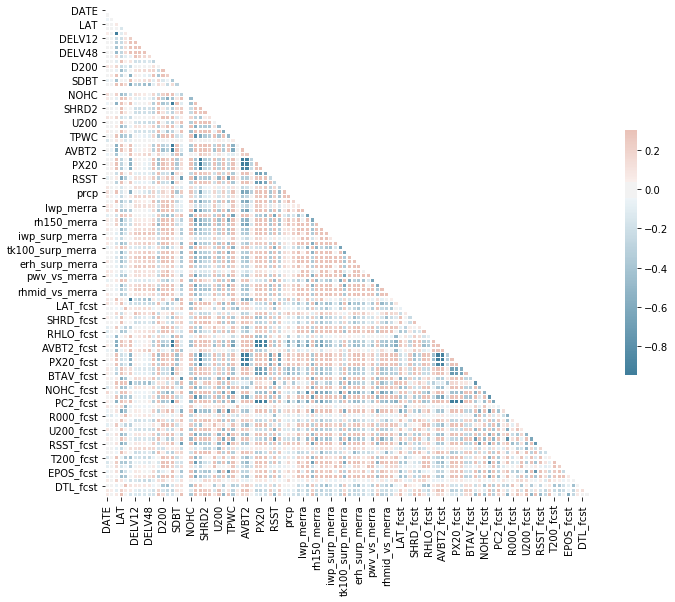

In [72]:
# Compute the correlation matrix

corr = ships.corr()



# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [73]:
null_counts = count_null(ships)
null_counts

{'NAME': 0,
 'DATE': 0,
 'HOUR': 0,
 'VMAX': 0,
 'LAT': 0,
 'LON': 0,
 'MSLP': 127,
 'ID': 0,
 'DELV12': 1067,
 'DELV24': 2122,
 'DELV36': 3117,
 'DELV48': 4035,
 'PER': 2225,
 'SHRD': 0,
 'D200': 0,
 'RHLO': 0,
 'PX30': 1075,
 'SDBT': 1075,
 'POT': 0,
 'RHCN': 0,
 'NOHC': 4396,
 'TPW': 0,
 'PC2': 1656,
 'SHRD2': 0,
 'SHRG': 0,
 'DIVC': 104,
 'U200': 0,
 'EPSS': 0,
 'ENSS': 0,
 'TPWC': 0,
 'PC1': 1656,
 'AVBT': 1075,
 'AVBT2': 1075,
 'SDBT2': 1075,
 'PX10': 1075,
 'PX20': 1075,
 'PX50': 1075,
 'TBMX': 1075,
 'RSST': 0,
 'BTAV': 1075,
 'VS': 6178,
 'prcp': 6178,
 'prcp_surp': 6178,
 'iwp_merra': 4975,
 'lwp_merra': 4975,
 'pwv_merra': 4975,
 'tk100_merra': 4975,
 'rh150_merra': 4975,
 'rhmid_merra': 4975,
 'erh_merra': 4975,
 'iwp_surp_merra': 4983,
 'lwp_surp_merra': 4983,
 'pwv_surp_merra': 4983,
 'tk100_surp_merra': 4983,
 'rh150_surp_merra': 4983,
 'rhmid_surp_merra': 4983,
 'erh_surp_merra': 4983,
 'iwp_vs_merra': 4983,
 'lwp_vs_merra': 4983,
 'pwv_vs_merra': 4983,
 'tk100_vs_merra

In [74]:
# Pad the date columns with 00 for the year 2000
ships['DATE'] = ships['DATE'].apply(lambda x: str(x).zfill(6))
ships['DATE'] = ships['DATE'].apply(lambda x: ('19' + str(x)[0:2] + str(x)[2:]) if (str(x)[0:1]!= '0' and str(x)[0:1]!= '1') else ('20' + str(x)[0:2] + str(x)[2:]))
 
ships['HOUR'] = ships['HOUR'].astype(str)
ships['HOUR'] = ships['HOUR'].apply(lambda x: ('0'+str(x)) if (x=='0' or x=='6') else x)

ships['DATETIME'] = ships['DATE'] + ' '+ ships['HOUR']
ships['DATETIME'] = pd.to_datetime(ships['DATETIME'], format = '%Y%m%d %H')

# Extract month from date
ships['MONTH'] = ships['DATE'].apply(lambda x: str(x)[4:6]).astype(int)

ships['Wind_Speed_24'] = ships['VMAX']+ships['DELV24']

# Extract year from date
ships['YEAR'] = ships['DATE'].apply(lambda x: (str(x)[0:4]))
ships.head()

# Dropping all DELV columns
# - Dropping DELV columns before droping null values saved 1971 data points
ships=ships[['DATETIME','ID','NAME','DATE','HOUR','Wind_Speed_24','DELV24','DELV36','DELV48','MONTH','VMAX','LAT','LON','PER','SHRD','D200','RHLO','SDBT',
            'POT','PC2','SHRD2','SHRG','DIVC','U200','EPSS','ENSS','TPWC','PC1','SDBT2','TBMX','RSST']]

ships.sort_index()
ships.head(50)

,DATETIME,ID,NAME,DATE,HOUR,Wind_Speed_24,DELV24,DELV36,DELV48,MONTH,VMAX,LAT,LON,PER,SHRD,D200,RHLO,SDBT,POT,PC2,SHRD2,SHRG,DIVC,U200,EPSS,ENSS,TPWC,PC1,SDBT2,TBMX,RSST
0,1982-06-02 12:00:00,AL011982,ALBE,19820602,12,50.0,30.0,45.0,25.0,6,20,21.7,-87.1,NaN,26.4,64,70,NaN,-103,NaN,25.1,29.6,49.0,22.4,5.1,1.6,61.8,NaN,NaN,NaN,28.0
1,1982-06-02 18:00:00,AL011982,ALBE,19820602,18,75.0,50.0,30.0,15.0,6,25,22.2,-86.5,NaN,19.4,65,68,NaN,-97,NaN,21.6,30.2,45.0,18.7,4.8,2.0,61.9,NaN,NaN,NaN,28.0
2,1982-06-03 00:00:00,AL011982,ALBE,19820603,00,65.0,35.0,15.0,0.0,6,30,22.6,-85.8,10.0,19.3,84,70,NaN,-87,NaN,18.6,29.8,75.0,16.9,5.2,1.8,61.0,NaN,NaN,NaN,27.8
3,1982-06-03 06:00:00,AL011982,ALBE,19820603,06,55.0,15.0,0.0,-15.0,6,40,22.8,-85.0,15.0,17.7,70,70,NaN,-75,NaN,22.1,36.2,88.0,17.9,4.8,1.8,60.3,NaN,NaN,NaN,27.6
4,1982-06-03 12:00:00,AL011982,ALBE,19820603,12,45.0,-5.0,-20.0,-25.0,6,50,23.2,-84.2,20.0,17.4,51,66,NaN,-71,NaN,24.3,34.0,60.0,20.9,2.2,2.2,61.5,NaN,NaN,NaN,27.4
5,1982-06-03 18:00:00,AL011982,ALBE,19820603,18,40.0,-35.0,-50.0,-50.0,6,75,24.0,-83.6,35.0,20.3,114,69,NaN,-30,NaN,25.5,32.8,125.0,22.1,4.2,2.3,58.8,NaN,NaN,NaN,27.0
6,1982-06-04 00:00:00,AL011982,ALBE,19820604,00,30.0,-35.0,-40.0,-40.0,6,65,24.8,-83.4,15.0,26.0,42,67,NaN,-38,NaN,26.3,39.6,48.0,23.4,4.1,2.1,54.1,NaN,NaN,NaN,26.9
7,1982-06-04 06:00:00,AL011982,ALBE,19820604,06,25.0,-30.0,-30.0,-30.0,6,55,24.9,-84.1,-20.0,23.2,27,67,NaN,-56,NaN,29.4,44.2,24.0,23.6,4.2,1.9,51.9,NaN,NaN,NaN,27.2
8,1982-06-04 12:00:00,AL011982,ALBE,19820604,12,25.0,-20.0,-20.0,-25.0,6,45,24.9,-84.8,-20.0,19.0,-7,68,NaN,-68,NaN,26.5,40.6,-24.0,22.1,5.0,1.8,50.3,NaN,NaN,NaN,27.4
9,1982-06-04 18:00:00,AL011982,ALBE,19820604,18,25.0,-15.0,-15.0,NaN,6,40,25.0,-84.2,-15.0,10.2,8,68,NaN,-64,NaN,21.9,33.3,2.0,20.2,5.5,2.2,51.3,NaN,NaN,NaN,27.2


In [75]:
new_ships=pd.DataFrame()
for index in ships.index:
    if index == 0:
        curr=ships.loc[index]
    else:
        curr=ships.loc[index]
        prev=ships.loc[index-1]
        if curr['ID']==prev['ID']:
            for col in ships.columns:
                    curr[col+'_6']=prev[col]
        else:
            curr=ships.loc[index]
            
    new_ships=new_ships.append(curr)



C:\Users\kwonk\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\kwonk\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [77]:
new_ships

,D200,DATE,DATETIME,DELV24,DELV36,DELV48,DIVC,ENSS,EPSS,HOUR,ID,LAT,LON,MONTH,NAME,PC1,PC2,PER,POT,RHLO,RSST,SDBT,SDBT2,SHRD,SHRD2,SHRG,TBMX,TPWC,U200,VMAX,Wind_Speed_24,D200_6,DATETIME_6,DATE_6,DELV24_6,DELV36_6,DELV48_6,DIVC_6,ENSS_6,EPSS_6,HOUR_6,ID_6,LAT_6,LON_6,MONTH_6,NAME_6,PC1_6,PC2_6,PER_6,POT_6,RHLO_6,RSST_6,SDBT2_6,SDBT_6,SHRD2_6,SHRD_6,SHRG_6,TBMX_6,TPWC_6,U200_6,VMAX_6,Wind_Speed_24_6
0,64.0,19820602,1982-06-02 12:00:00,30.0,45.0,25.0,49.0,1.6,5.1,12,AL011982,21.7,-87.1,6.0,ALBE,NaN,NaN,NaN,-103.0,70.0,28.0,NaN,NaN,26.4,25.1,29.6,NaN,61.8,22.4,20.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,65.0,19820602,1982-06-02 18:00:00,50.0,30.0,15.0,45.0,2.0,4.8,18,AL011982,22.2,-86.5,6.0,ALBE,NaN,NaN,NaN,-97.0,68.0,28.0,NaN,NaN,19.4,21.6,30.2,NaN,61.9,18.7,25.0,75.0,64.0,1982-06-02 12:00:00,19820602,30.0,45.0,25.0,49.0,1.6,5.1,12,AL011982,21.7,-87.1,6.0,ALBE,NaN,NaN,NaN,-103.0,70.0,28.0,NaN,NaN,25.1,26.4,29.6,NaN,61.8,22.4,20.0,50.0
2,84.0,19820603,1982-06-03 00:00:00,35.0,15.0,0.0,75.0,1.8,5.2,00,AL011982,22.6,-85.8,6.0,ALBE,NaN,NaN,10.0,-87.0,70.0,27.8,NaN,NaN,19.3,18.6,29.8,NaN,61.0,16.9,30.0,65.0,65.0,1982-06-02 18:00:00,19820602,50.0,30.0,15.0,45.0,2.0,4.8,18,AL011982,22.2,-86.5,6.0,ALBE,NaN,NaN,NaN,-97.0,68.0,28.0,NaN,NaN,21.6,19.4,30.2,NaN,61.9,18.7,25.0,75.0
3,70.0,19820603,1982-06-03 06:00:00,15.0,0.0,-15.0,88.0,1.8,4.8,06,AL011982,22.8,-85.0,6.0,ALBE,NaN,NaN,15.0,-75.0,70.0,27.6,NaN,NaN,17.7,22.1,36.2,NaN,60.3,17.9,40.0,55.0,84.0,1982-06-03 00:00:00,19820603,35.0,15.0,0.0,75.0,1.8,5.2,00,AL011982,22.6,-85.8,6.0,ALBE,NaN,NaN,10.0,-87.0,70.0,27.8,NaN,NaN,18.6,19.3,29.8,NaN,61.0,16.9,30.0,65.0
4,51.0,19820603,1982-06-03 12:00:00,-5.0,-20.0,-25.0,60.0,2.2,2.2,12,AL011982,23.2,-84.2,6.0,ALBE,NaN,NaN,20.0,-71.0,66.0,27.4,NaN,NaN,17.4,24.3,34.0,NaN,61.5,20.9,50.0,45.0,70.0,1982-06-03 06:00:00,19820603,15.0,0.0,-15.0,88.0,1.8,4.8,06,AL011982,22.8,-85.0,6.0,ALBE,NaN,NaN,15.0,-75.0,70.0,27.6,NaN,NaN,22.1,17.7,36.2,NaN,60.3,17.9,40.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11777,29.0,20171108,2017-11-08 00:00:00,0.0,NaN,NaN,36.0,5.0,1.3,00,AL192017,34.6,-48.7,11.0,RINA,15.0,123.0,5.0,-37.0,71.0,23.5,24.3,280.0,20.5,25.2,33.1,15.4,42.9,22.0,45.0,45.0,28.0,2017-11-07 18:00:00,20171107,5.0,NaN,NaN,28.0,4.8,1.2,18,AL192017,33.0,-49.1,11.0,RINA,15.0,127.0,0.0,-51.0,66.0,24.2,263.0,24.7,24.7,17.6,34.0,11.2,43.7,22.0,40.0,45.0
11778,19.0,20171108,2017-11-08 06:00:00,NaN,NaN,NaN,16.0,5.4,1.1,06,AL192017,36.4,-48.7,11.0,RINA,15.0,90.0,10.0,-28.0,73.0,22.9,14.7,192.0,20.8,24.5,32.3,-17.2,43.0,21.8,50.0,NaN,29.0,2017-11-08 00:00:00,20171108,0.0,NaN,NaN,36.0,5.0,1.3,00,AL192017,34.6,-48.7,11.0,RINA,15.0,123.0,5.0,-37.0,71.0,23.5,280.0,24.3,25.2,20.5,33.1,15.4,42.9,22.0,45.0,45.0
11779,12.0,20171108,2017-11-08 12:00:00,NaN,NaN,NaN,3.0,6.7,0.0,12,AL192017,38.3,-48.8,11.0,RINA,15.0,126.0,0.0,-29.0,74.0,22.7,13.5,173.0,21.2,25.2,33.8,-3.4,43.0,23.0,45.0,NaN,19.0,2017-11-08 06:00:00,20171108,NaN,NaN,NaN,16.0,5.4,1.1,06,AL192017,36.4,-48.7,11.0,RINA,15.0,90.0,10.0,-28.0,73.0,22.9,192.0,14.7,24.5,20.8,32.3,-17.2,43.0,21.8,50.0,NaN
11780,14.0,20171108,2017-11-08 18:00:00,NaN,NaN,NaN,20.0,9.8,0.0,18,AL192017,40.1,-49.0,11.0,RINA,15.0,75.0,-5.0,-14.0,70.0,21.3,11.5,145.0,22.5,29.1,38.9,-33.0,44.3,28.4,45.0,NaN,12.0,2017-11-08 12:00:00,20171108,NaN,NaN,NaN,3.0,6.7,0.0,12,AL192017,38.3,-48.8,11.0,RINA,15.0,126.0,0.0,-29.0,74.0,22.7,173.0,13.5,25.2,21.2,33.8,-3.4,43.0,23.0,45.0,NaN


In [79]:
new_ships.to_csv(r'C:\Users\kwonk\Guided Project\RMDS_Hurricane_Forecasting\data\ships_cleaned.csv')